In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
from simpleicp import PointCloud, SimpleICP

In [2]:
with open('masks.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
data

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 162,
  'bbox': [403, 338, 28, 13],
  'predicted_iou': 0.9061435461044312,
  'point_coords': [[411.0, 351.0]],
  'stability_score': 0.9580838084220886,
  'crop_box': [378.0, 270.0, 198.0, 162.0]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 1488,
  'bbox': [0, 377,

In [28]:
def read_coords(pkl):
    coords = []
    for d in pkl:
        coords.append(d['point_coords'])
    return np.array(coords).reshape(np.shape(coords)[0], np.shape(coords)[2])

def find_seg_centers(pkl):
    centers = []
    for d in pkl:
        img = np.array(d['segmentation']).astype('uint8')
        contours,hierarchy = cv2.findContours(img, 1,2)
        M = cv2.moments(contours[0])
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        centers.append([cx, cy])
    return centers

def icp_coord(template, coords):
    pc_fix = PointCloud(coords, columns=["x", "y", "z"])
    pc_mov = PointCloud(template, columns=["x", "y", "z"])
    
    icp = SimpleICP()
    icp.add_point_clouds(pc_fix, pc_mov)
    H, X_mov_transformed, rigid_body_transformation_params, distance_residuals = icp.run(max_overlap_distance=100)
    return H

In [29]:
data

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 162,
  'bbox': [403, 338, 28, 13],
  'predicted_iou': 0.9061435461044312,
  'point_coords': [[411.0, 351.0]],
  'stability_score': 0.9580838084220886,
  'crop_box': [378.0, 270.0, 198.0, 162.0]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 1488,
  'bbox': [0, 377,

In [30]:
coords = np.array(find_seg_centers(data))

In [6]:
coords_3d = np.zeros((np.shape(coords)[0], 3))
coords_3d[:, 0:2] = coords

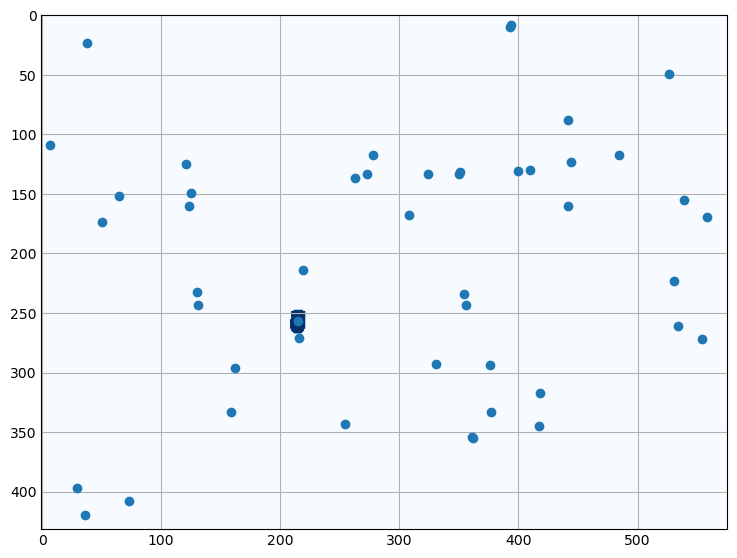

In [7]:
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(data[11]['segmentation'])
ax.scatter(coords[:, 0], coords[:, 1])

In [8]:
icp_coord(coords_3d, coords_3d)

Consider partial overlap of point clouds ...
Select points for correspondences in fixed point cloud ...
Estimate normals of selected points ...
Start iterations ...
iteration | correspondences | mean(residuals) |  std(residuals)
   orig:0 |              27 |          0.0000 |          0.0000
        1 |              26 |          0.0000 |          0.0000
        2 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


        3 |              26 |          0.0000 |          0.0000
        4 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


        5 |              26 |          0.0000 |          0.0000
        6 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


        7 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


        8 |              26 |          0.0000 |          0.0000
        9 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       10 |              26 |          0.0000 |          0.0000
       11 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       12 |              26 |          0.0000 |          0.0000
       13 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       14 |              26 |          0.0000 |          0.0000
       15 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       16 |              26 |          0.0000 |          0.0000
       17 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       18 |              26 |          0.0000 |          0.0000
       19 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       20 |              26 |          0.0000 |          0.0000
       21 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       22 |              26 |          0.0000 |          0.0000
       23 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       24 |              26 |          0.0000 |          0.0000
       25 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       26 |              26 |          0.0000 |          0.0000
       27 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       28 |              26 |          0.0000 |          0.0000
       29 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       30 |              26 |          0.0000 |          0.0000
       31 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       32 |              26 |          0.0000 |          0.0000
       33 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       34 |              26 |          0.0000 |          0.0000
       35 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       36 |              26 |          0.0000 |          0.0000
       37 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       38 |              26 |          0.0000 |          0.0000
       39 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       40 |              26 |          0.0000 |          0.0000
       41 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       42 |              26 |          0.0000 |          0.0000
       43 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       44 |              26 |          0.0000 |          0.0000
       45 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       46 |              26 |          0.0000 |          0.0000
       47 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       48 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       49 |              26 |          0.0000 |          0.0000
       50 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       51 |              26 |          0.0000 |          0.0000
       52 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       53 |              26 |          0.0000 |          0.0000
       54 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       55 |              26 |          0.0000 |          0.0000
       56 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       57 |              26 |          0.0000 |          0.0000
       58 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       59 |              26 |          0.0000 |          0.0000
       60 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       61 |              26 |          0.0000 |          0.0000
       62 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       63 |              26 |          0.0000 |          0.0000
       64 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       65 |              26 |          0.0000 |          0.0000
       66 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       67 |              26 |          0.0000 |          0.0000
       68 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       69 |              26 |          0.0000 |          0.0000
       70 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       71 |              26 |          0.0000 |          0.0000
       72 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       73 |              26 |          0.0000 |          0.0000
       74 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       75 |              26 |          0.0000 |          0.0000
       76 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       77 |              26 |          0.0000 |          0.0000
       78 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       79 |              26 |          0.0000 |          0.0000
       80 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       81 |              26 |          0.0000 |          0.0000
       82 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       83 |              26 |          0.0000 |          0.0000
       84 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       85 |              26 |          0.0000 |          0.0000
       86 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       87 |              26 |          0.0000 |          0.0000
       88 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       89 |              26 |          0.0000 |          0.0000
       90 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       91 |              26 |          0.0000 |          0.0000
       92 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       93 |              26 |          0.0000 |          0.0000
       94 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       95 |              26 |          0.0000 |          0.0000
       96 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       97 |              26 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       98 |              26 |          0.0000 |          0.0000
       99 |              26 |          0.0000 |          0.0000
      100 |              26 |          0.0000 |          0.0000
Estimated transformation matrix H:
[    1.000000    -0.000000     0.000000     0.000000]
[    0.000000     1.000000    -0.000000     0.000000]
[    0.000000     0.000000     1.000000     0.000000]
[    0.000000     0.000000     0.000000     1.000000]
... which corresponds to the following rigid-body transformation parameters:
parameter |       est.value | est.uncertainty |       obs.value |      obs.weight
   alpha1 |        0.000000 |             nan |        0.000000 |       0.000e+00
   alpha2 |        0.000000 |             nan |        0.000000 |       0.000e+00
   alpha3 |        0.000000 |             nan |        0.000000 |       0.000e+00
       tx |        0.000000 |             nan |        0.000000 |       0.000e+00
       ty |        0.000000 |             nan |        0.000000 |     

/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


array([[ 1., -0.,  0.,  0.],
       [ 0.,  1., -0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [9]:
np.shape(coords_3d)

(48, 3)

In [26]:
coords_3d_part = coords_3d[np.logical_and(coords_3d[:, 0] > 300, coords_3d[:, 0] < 500)]
coords_3d_part[:, 0] = coords_3d_part[:, 0] + 5
coords_3d_part[:, 1] = coords_3d_part[:, 1] + 10

In [31]:
icp_coord(coords_3d_part, coords_3d)

Consider partial overlap of point clouds ...
Select points for correspondences in fixed point cloud ...
Estimate normals of selected points ...
Start iterations ...
iteration | correspondences | mean(residuals) |  std(residuals)
   orig:0 |              17 |          0.0000 |          0.0000
        1 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


        2 |              16 |          0.0000 |          0.0000
        3 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


        4 |              16 |          0.0000 |          0.0000
        5 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


        6 |              16 |          0.0000 |          0.0000
        7 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


        8 |              16 |          0.0000 |          0.0000
        9 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       10 |              16 |          0.0000 |          0.0000
       11 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       12 |              16 |          0.0000 |          0.0000
       13 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       14 |              16 |          0.0000 |          0.0000
       15 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       16 |              16 |          0.0000 |          0.0000
       17 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       18 |              16 |          0.0000 |          0.0000
       19 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       20 |              16 |          0.0000 |          0.0000
       21 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       22 |              16 |          0.0000 |          0.0000
       23 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       24 |              16 |          0.0000 |          0.0000
       25 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       26 |              16 |          0.0000 |          0.0000
       27 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       28 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       29 |              16 |          0.0000 |          0.0000
       30 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       31 |              16 |          0.0000 |          0.0000
       32 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       33 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       34 |              16 |          0.0000 |          0.0000
       35 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       36 |              16 |          0.0000 |          0.0000
       37 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       38 |              16 |          0.0000 |          0.0000
       39 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       40 |              16 |          0.0000 |          0.0000
       41 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       42 |              16 |          0.0000 |          0.0000
       43 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       44 |              16 |          0.0000 |          0.0000
       45 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       46 |              16 |          0.0000 |          0.0000
       47 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       48 |              16 |          0.0000 |          0.0000
       49 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       50 |              16 |          0.0000 |          0.0000
       51 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       52 |              16 |          0.0000 |          0.0000
       53 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       54 |              16 |          0.0000 |          0.0000
       55 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       56 |              16 |          0.0000 |          0.0000
       57 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       58 |              16 |          0.0000 |          0.0000
       59 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       60 |              16 |          0.0000 |          0.0000
       61 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       62 |              16 |          0.0000 |          0.0000
       63 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       64 |              16 |          0.0000 |          0.0000
       65 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       66 |              16 |          0.0000 |          0.0000
       67 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       68 |              16 |          0.0000 |          0.0000
       69 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       70 |              16 |          0.0000 |          0.0000
       71 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       72 |              16 |          0.0000 |          0.0000
       73 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       74 |              16 |          0.0000 |          0.0000
       75 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       76 |              16 |          0.0000 |          0.0000
       77 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       78 |              16 |          0.0000 |          0.0000
       79 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       80 |              16 |          0.0000 |          0.0000
       81 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       82 |              16 |          0.0000 |          0.0000
       83 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       84 |              16 |          0.0000 |          0.0000
       85 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       86 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       87 |              16 |          0.0000 |          0.0000
       88 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       89 |              16 |          0.0000 |          0.0000
       90 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       91 |              16 |          0.0000 |          0.0000
       92 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       93 |              16 |          0.0000 |          0.0000
       94 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       95 |              16 |          0.0000 |          0.0000
       96 |              16 |          0.0000 |          0.0000


/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


       97 |              16 |          0.0000 |          0.0000
       98 |              16 |          0.0000 |          0.0000
       99 |              16 |          0.0000 |          0.0000
      100 |              16 |          0.0000 |          0.0000
Estimated transformation matrix H:
[    1.000000    -0.000000     0.000000     0.000000]
[    0.000000     1.000000    -0.000000     0.000000]
[    0.000000     0.000000     1.000000     0.000000]
[    0.000000     0.000000     0.000000     1.000000]
... which corresponds to the following rigid-body transformation parameters:
parameter |       est.value | est.uncertainty |       obs.value |      obs.weight
   alpha1 |        0.000000 |             nan |        0.000000 |       0.000e+00
   alpha2 |        0.000000 |             nan |        0.000000 |       0.000e+00
   alpha3 |        0.000000 |             nan |        0.000000 |       0.000e+00
       tx |        0.000000 |             nan |        0.000000 |       0.000e+00
      

/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)
/home/harryting/anaconda3/envs/robothon/lib/python3.10/site-packages/simpleicp/simpleicp.py:331: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs((new - old) / old * 100)


array([[ 1., -0.,  0.,  0.],
       [ 0.,  1., -0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [10]:
import cv2

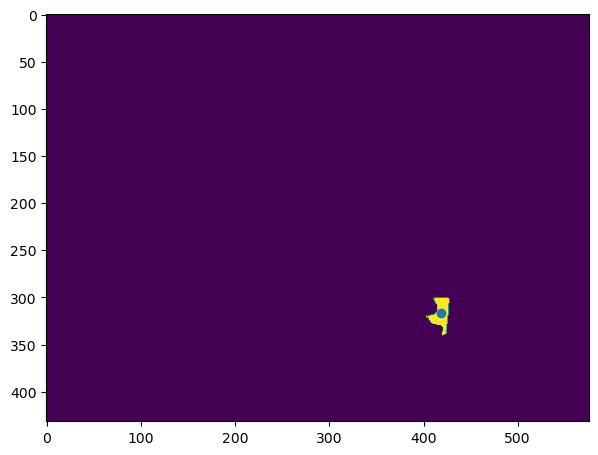

In [5]:
img = np.array(data[10]['segmentation']).astype('uint8')
contours,hierarchy = cv2.findContours(img, 1,2)
fig, ax = plt.subplots(figsize=(7, 7))
con = np.array(contours)
M = cv2.moments(contours[0])
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
ax.imshow(img)    
ax.scatter(cx, cy)


In [12]:
cx

393

In [13]:
cy

10